# Overview

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In this section, we will explore a number of different simulations involving a group of agents, each of which has a different opinion or belief about one or more events. The agents will update their beliefs in response to evidence and/or testimony from other agents in the group.  

We typically represent the an agent's opinion or belief (sometimes called the agent's *credence*) as a *probability*.   There is an extensive literature about using probability to represent beliefs: 

* W. Talbott, [Bayesian Epistemology](https://plato.stanford.edu/entries/epistemology-bayesian/), Stanford Encyclopedia of Philosophy
* A. Hajek, [Interpretations of Probability](https://plato.stanford.edu/entries/probability-interpret/), Stanford Encyclopedia of Philosophy



### Probability Measures

Suppose that $W$ is a set of states (i.e., the possible *outcomes*).

A $\sigma$-algebra is a set $\Sigma\subseteq\wp(W)$ such that 

* $W\in\Sigma$
* If $A\in\Sigma$, then $\overline{A}\in \Sigma$
* If $\{A_i\}$ is a countable collection of sets from $\Sigma$, then $\bigcup_i A_i\in\Sigma$


A  **probability measure** is a function $Pr:\Sigma\rightarrow[0,1]$ satisfying: 

1. $Pr(W)=1$
2. $Pr(A\cup B)=Pr(A)+Pr(B)$ whenever $A\cap B=\emptyset$


$(W,\Sigma,Pr)$ is called a probability space.  

A probability measure $Pr$ satisfies the **Kolmogorov Axioms**:

1. For each $E\in\Sigma$, $0\le Pr(E)\le 1$ 
2. $Pr(W)=1$ and  $Pr(\emptyset)=0$
3. If $E_1,\ldots, E_n,\ldots$ are pairwise disjoint ($E_i\cap E_j=\emptyset$ for $i\ne j$), then $Pr(\bigcup_i E_i)=\sum_i Pr(E_i)$

Other properties (derivable from the above axioms) include: 

1. $Pr(\overline{E})=1-Pr(E)$ ($\overline{E}$ is the complement of $E$)
2. If $E\subseteq F$ then $Pr(E)\le Pr(F)$
3. $Pr(E\cup F)=Pr(E)+Pr(F)-Pr(E\cap F)$

Given a probability measure $Pr$ on $(W, \Sigma)$ and events $E,F\in \Sigma$, the **conditional probability** if $E$ given $F$ is

$$Pr(E\mid F)=\frac{Pr(E\cap F)}{Pr(F)}$$

where $Pr(F)>0$ (the conditional probability is undefined when $Pr(F)=0$). 


## Probability in Python: Discrete Probability

When there is a single proposition or event about which the agents have a belief, then it is very easy to represent an agent's beliefs as a single floating point variable.

When there is a finite set of mutually exclusive and exhaustive outcomes, the best way is to represent a probability over this set outcomes as a list or a dictionary.  For instance, suppose that there are 4 mutually exclusive and exhaustive outcomes.  Then we can represent the probability over these 4 as a list of floats whose sum in 1.0: 

In [2]:
prs = [0.1, 0.25, 0.25, 0.4]

print("The sum is", sum(prs))

The sum is 1.0


To choose the outcome with the given probabilities, you can use either import the `random` package

`random.choices`: see [https://www.w3schools.com/python/ref_random_choices.asp](https://www.w3schools.com/python/ref_random_choices.asp)

or import `numpy` and use

`numpy.random.choice`: see [https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

For instance,  use the following code to randomly select the propositions 0, 1, 2, 3 or 4 given the above probabilities `prs`:

In [3]:
import numpy as np

# you will get a different result every time the code is executed
print(np.random.choice(range(len(prs)), p = prs))

3


Sometimes it is more convenient to use a dictionary to represent the agent's probability.  This may be useful when the events are represented as strings or some other mutable object: 

In [4]:
prs_as_dict = { "E1": 0.1, "E2": 0.25, "E3": 0.25, "E4": 0.4}

events = list(prs_as_dict.keys())
# do 5 samples, you will get a different result every time the code is executed
for s in range(5):
    print(np.random.choice(events, p = [prs_as_dict[e] for e in events]))

E3
E1
E2
E2
E4


```{warning}
You might have expected that I would have implemented the random choice as follows: 

`print(np.random.choice(prs_as_dict.keys(), p = prs_as_dict.values())`.   There are two problems with this: 

1. It will produce an error since the `keys` and `values` methods return objects that are not subscriptable.  So, one could  use: `print(np.random.choice(list(prs_as_dict.keys()), p = list(prs_as_dict.values()))`.   
2. Even if you can remove the error by casting the dict keys and values to lists, there may still be a problem with the above code.   The issue is that it needs to be clear that the list assigned to `p` are indeed the probabilities of the times in the list provided as the first parameter to `np.random.choice`.  The above code makes this clear.  Futhermore, unlike lists, dictionaries are inherently **orderless**. (See [https://www.geeksforgeeks.org/ordereddict-in-python/](https://www.geeksforgeeks.org/ordereddict-in-python/) for an overview of a new addition to Python 3 called `OrderedDict` that orders the keys in a dictionary.)
```

When reasoning about acts that have two outcomes ("success" and "failure"), it will be convenient to use the [numpy binomial distribution](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html). 


In [5]:
import numpy as np

num_trials = 100
prob_success = 0.5

# number of success after 100 tries, tested 2 times.  
print(np.random.binomial(num_trials, prob_success, 5))


[45 57 55 54 60]


We can use the [seaborn displot](https://seaborn.pydata.org/generated/seaborn.displot.html) to visualize the outcomes of sampling from a binomial distribution. 

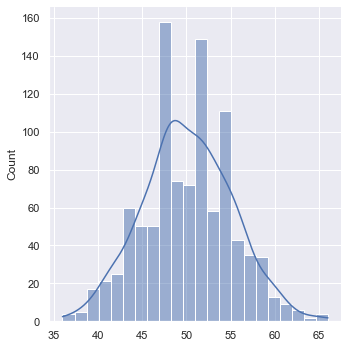

In [6]:
num_trials = 100
prob_success = 0.5
successes = np.random.binomial(num_trials, prob_success, 1000)
ax = sns.displot(successes, kde=True)

```{note}
If your simulation requires using discrete probabilities when there are more than 2 outcomes, then you might want to use the `lea` package.  This package provides a very extensive set of tools for defining and using discrete probabilities, including tools for defining and reasoning about Bayesian Networks.  For more information, read the [tutorial](https://bitbucket.org/piedenis/lea/wiki/Lea3_Tutorial_1). 

```

## Probability in Python: Continuous Probability

There are many continuous distributions that have been implemented in Python: See [https://docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html).   We will discuss all of these distributions here.


We will briefly discuss two well-known distributions: the [normal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) and the [beta distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html).  

In [7]:
from scipy.stats import norm

# define a normal distribution is defined by specifying the mean and standard deviation
mean = 10
std = 2
mean, var = norm(mean, std).stats()
print("The mean is ", mean)
print("The variance is ", var)


# the default values is a mean of 0 and std of 1
mean, var = norm().stats()
print("The mean is ", mean)
print("The variance is ", var)


The mean is  10.0
The variance is  4.0
The mean is  0.0
The variance is  1.0


The probability of an outcome is less than 7.5 is 0.10564977366685535
The probability of an outcome is between 8 and 12 is 0.6826894921370859
The probability of an outcome is greater than 10.5 is 0.4012936743170763


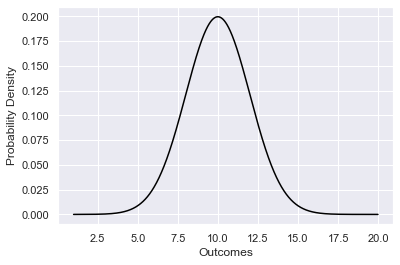

In [8]:
from scipy.stats import norm
import numpy as np

mean = 10
std = 2

xs = np.arange(1,20,0.01)
pdf = norm.pdf(xs ,  mean ,  std )

sns.lineplot(x=xs, y=pdf , color = 'black')
plt.xlabel('Outcomes')
plt.ylabel('Probability Density')

print(f"The probability of an outcome is less than 7.5 is {norm( mean, std).cdf(7.5)}")
 
#probability that the height of the person will be between 6.5 and 4.5 ft.

cdf_upper_limit = norm(mean, std).cdf(12)
cdf_lower_limit = norm(mean, std).cdf(8)
print(f"The probability of an outcome is between 8 and 12 is {cdf_upper_limit - cdf_lower_limit}")
 
cdf_value = norm(mean, std).cdf(10.5)
print(f"The probability of an outcome is greater than 10.5 is {1- cdf_value}")


The domain of a normal distribution is infinite. This means that when you sample from a normal distribution you could potentially get any number (the probability might be very low that you will get certain values, depending on the mean and the standard deviation, but it is a possibility).  

In [9]:
# return 100 samples from a normal distrubtion with mean 0.5 and standard deviation 0.2
# note that as your run this multiple times, you might get values less than 0 or greater than 1
print(np.random.normal(0.5,0.2, 100))

[ 0.24400967  0.95935281  0.26755399  0.40544344  0.4016341   0.28696165
  0.39008875  0.42828162  0.53308399  0.23170055  0.57451432  0.53668459
  0.76220322  0.55576343  0.68212208  0.75988277  0.3220451   0.57504712
 -0.0354033   0.81357947  0.4653134   0.58256746  0.2233155   0.51593616
  0.36814643  0.6055326   0.73444592  0.78959812  0.68875112  0.59692629
  0.52227789  0.31587617  0.62028731  0.58455535  0.56688426  0.24069066
  0.59638703  0.64561361  0.52189694  0.38000636  0.48108758  0.78495811
  0.73990781  0.64353866  0.6498693   0.48083863  0.92417159  0.4973998
  0.35097986  0.40440254  0.66894703  0.3523425   0.36092093  0.708613
  0.66892531  0.30113635  0.27437242  0.18166378  0.49195541  0.55008959
 -0.05715427  0.47236628  0.39394625  0.18311831  0.51123588  0.47624563
  0.28714763  0.75331865  0.55663437  0.89214965  0.01319698  0.72242007
  0.39763915  0.53772977  0.45851187  0.52911746  0.59351323  0.53767016
  0.87153242  0.6172987   0.59971495  0.41252551  0.45

Often you might want to restrict the domain of your distribution to real numbers between 0 and 1. E.g., when initializing the probability of an event. In such a case, you should use the beta distribution. 

In [10]:
from scipy.stats import beta

#  a beta distribution is defined by two parameters: a and b

a = 1
b = 1
mean, var = beta(a, b).stats()
print(f"When a = {a} and b = {b}, the mean is", mean)
print(f"When a = {a} and b = {b}, the variance is", var)
print()

a = 10
b = 10
mean, var = beta(a, b).stats()
print(f"When a = {a} and b = {b}, the mean is", mean)
print(f"When a = {a} and b = {b}, the variance is", var)
print()


a = 20
b = 10
mean, var = beta(a, b).stats()
print(f"When a = {a} and b = {b}, the mean is", mean)
print(f"When a = {a} and b = {b}, the variance is", var)
print()


a = 10
b = 20
mean, var = beta(a, b).stats()
print(f"When a = {a} and b = {b}, the mean is", mean)
print(f"When a = {a} and b = {b}, the variance is", var)
print()


When a = 1 and b = 1, the mean is 0.5
When a = 1 and b = 1, the variance is 0.08333333333333333

When a = 10 and b = 10, the mean is 0.5
When a = 10 and b = 10, the variance is 0.011904761904761904

When a = 20 and b = 10, the mean is 0.6666666666666666
When a = 20 and b = 10, the variance is 0.007168458781362006

When a = 10 and b = 20, the mean is 0.3333333333333333
When a = 10 and b = 20, the variance is 0.007168458781362006



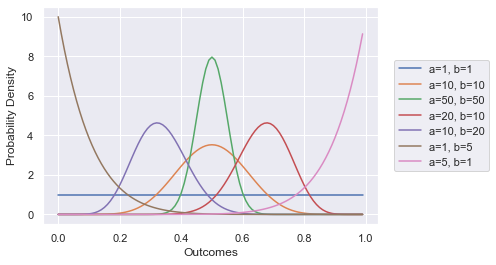

In [11]:
xs = np.arange(0,1,0.01)

sns.lineplot(x=xs, y=[beta(1,1).pdf(x) for x in xs], label="a=1, b=1")
sns.lineplot(x=xs, y=[beta(10,10).pdf(x) for x in xs], label="a=10, b=10")
sns.lineplot(x=xs, y=[beta(50,50).pdf(x) for x in xs], label="a=50, b=50")
sns.lineplot(x=xs, y=[beta(20,10).pdf(x) for x in xs], label="a=20, b=10")
sns.lineplot(x=xs, y=[beta(10,20).pdf(x) for x in xs], label="a=10, b=20")
sns.lineplot(x=xs, y=[beta(1,10).pdf(x) for x in xs], label="a=1, b=5")
sns.lineplot(x=xs, y=[beta(10,1).pdf(x) for x in xs], label="a=5, b=1")
plt.legend(loc='right', bbox_to_anchor=(1.35, 0.5))
plt.xlabel('Outcomes')
plt.ylabel('Probability Density');


```{note}
The [statsmodel package](https://www.statsmodels.org/stable/index.html) can also be used to reason about continuous distributions. 
```


## Learning

In many of the simulations, the agents will update their probabilities in response to some evidence.   

[Bayes Theorem](https://plato.stanford.edu/entries/bayes-theorem/)  is often used to update a probability in response to some evidence. ([See this video for an excellent introduction to Bayes Theroem](https://www.youtube.com/watch?v=HZGCoVF3YvM).)  Suppose that   $H$ is an hypothesis and $E$ is the evidence received about the hypothese (formally, both $H$ and $E$ are events in the domain of the probability measure $Pr$).   Then, 

$$Pr(H\mid E) = Pr(E\mid H)\frac{Pr(H)}{Pr(E)}$$

Typically, $Pr(E)$ is determined using the law of total probability: 

$$Pr(E)=Pr(H)Pr(E\mid H) + Pr(\overline{H})Pr(E\mid \overline{H})$$

where $\overline{H}$ is the complement of $H$, so $Pr(\overline{H})=1-Pr(H)$.  

We can illustrate Bayes Theorem as follows: 

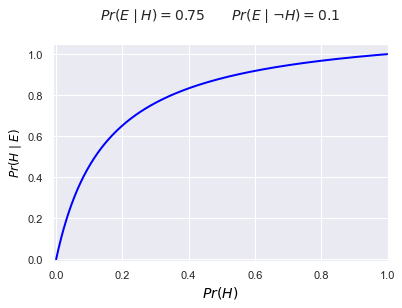

In [12]:
def bayes(prior, e_given_hyp, e_given_not_hyp):    
    return e_given_hyp * prior / (prior * e_given_hyp + (1-prior) * e_given_not_hyp)

priors =  np.linspace(0.0,1.0,1000)
e_given_h = 0.75
e_given_not_h = 0.1
plt.plot(priors, [bayes(p,e_given_h,e_given_not_h) for p in priors], color="blue", linewidth=2)
plt.title(f"$Pr(E\mid H)= {e_given_h}\qquad Pr(E\mid \\neg H)={e_given_not_h}$\n", fontsize=14)
plt.xlabel("$Pr(H)$", color='black',fontsize=14)
plt.ylabel("$Pr(H\mid E)$", color='black',fontsize=12)
plt.ylim([-0.01,1.05])
plt.xlim([-0.01,1])
plt.show();

Suppose that an agent is uncertain about the bias of a coin.  For instance, the coin might be a fair coin or it might have a bias of 0.55 for heads.   If an agent updates using Bayes Theorem, how many times does the agent need to flip a coin to learn bias? 

Suppose that there are only two possible biases (either it is fair with a bias of 0.5 or has a bias of 0.55 for heads).  Let  $H$ is the hypothesis that the coin being flipped is fair and so $\overline{H}$ is the hypothesis that the coin has a 0.55 bias for heads.  The evidence is the number of heads that are observed after flipping the coin a certain number of times.  For instance, suppose that evidence $E$ is that the coin is flipped 10 times and 6 heads are observed.   Then, $Pr(H\mid E)$ is:


$$Pr(H\mid E) = Pr(E\mid H)\frac{Pr(H)}{Pr(H)Pr(E\mid H) + Pr(\overline{H})Pr(E\mid \overline{H})}$$


Now, we know the likelihoods $Pr(E\mid H)$ and $Pr(E\mid\overline{H})$: 

1. $Pr(E\mid H)$ is the probability of observing 6 heads out of 10 flips with a bias of 0.5, i.e., it is $0.5^6*0.5^4 = 0.0009765625$. 
2. $Pr(E\mid \overline{H})$ is the probability of observing 6 heads out of 10 flips with a bias of 0.55, i.e., it is $0.55^6*0.45^4 = 0.00113507926$. 

If $Pr(H)=0.5$, applying Bayes Theorem, gives: 

$$Pr(H\mid E) = 0.0009765625 * \frac{0.5}{0.5* 0.0009765625 + 0.5* 0.00113507926} = 0.46246599139$$


We first implement a Coin class to define coins of different biases.  



```{warning} 
Calculating the probability of seeing a head for a large number of flips (e.g., flipping the coin 10,000 times) produces very small numbers.  You need to be careful with floating point arithmentic in Python: [https://docs.python.org/3/tutorial/floatingpoint.html](https://docs.python.org/3/tutorial/floatingpoint.html).  There are a number of ways to deal with these issue: 1. use the [`Decimal` package](https://docs.python.org/3/library/decimal.html) or 2. use the [mpmath](https://mpmath.org/) package.  
 
```

In [13]:
from mpmath import mp

# illustrate the problem 

print("0.5^4000 * 0.5^6000 = ", 0.5 ** 4000 * 0.5 ** 6000)
print("Using mpmath, 0.5^4000 * 0.5^6000 = ", mp.mpf(0.5)**mp.mpf(4000) * mp.mpf(0.5)**mp.mpf(6000))


0.5^4000 * 0.5^6000 =  0.0
Using mpmath, 0.5^4000 * 0.5^6000 =  5.01237274920645e-3011


In [14]:
class Coin(object):
    
    def __init__(self, bias):
        
        assert bias >= 0 and bias <= 1, f"The bias is {bias}, but it  must be between 0 and 1"
        self.bias = bias # the bias that that the coin lands heads when flipped
        
    def flip(self, num = 1): 
        '''returns the number of times flipping the coin returns heads'''
        return np.random.binomial(num, self.bias) 
        
    def pr(self, num_heads, num_flips):
        '''returns the exact probability of getting num_heads heads out of num_flips flips'''
        assert num_heads <= num_flips, f"the successes {num_heads} cannot be greater than the total {num_flips}"
        return mp.mpf(self.bias)**mp.mpf(num_heads) * mp.mpf((1 - self.bias))**mp.mpf((num_flips - num_heads))

    def __str__(self):
        return f"Pr(H)={self.bias}"

In [15]:
fair_coin = Coin(0.5)
print(fair_coin)
print("The probability of observing 25 heads after flipping fair_coin 50 times is ", fair_coin.pr(25,50))
print("The number of heads after flipping the fair_coin 50 times is ", fair_coin.flip(50))

biased_coin = Coin(0.55)
print(biased_coin)
print("The probability of observing 25 heads after flipping biased_coin 50 times is ", biased_coin.pr(25,50))
print("The number of heads after flipping biased_coin 50 times is ", biased_coin.flip(50))


Pr(H)=0.5
The probability of observing 25 heads after flipping fair_coin 50 times is  8.88178419700125e-16
The number of heads after flipping the fair_coin 50 times is  26
Pr(H)=0.55
The probability of observing 25 heads after flipping biased_coin 50 times is  6.90844145800137e-16
The number of heads after flipping biased_coin 50 times is  31


It is not hard to define a learner that updates their beliefs in response to observing the number of times the coin lands hands when flipping it a certain number of times. 

In [16]:
class Learner(object):
    
    def __init__(self, pr):
        '''pr is a dictionary assigning floats that sum to 1 over some coins'''
        self.pr = pr
        
    def belief(self, coin):
        return self.pr[coin]
    
    def update_bayes(self, num_heads, num_flips): 
        '''update using Bayes Theorem'''
        new_bel = dict()
        for coin in self.pr.keys():
            new_bel[coin] = coin.pr(num_heads, num_flips) * self.pr[coin] / sum((self.pr[_c] * _c.pr(num_heads, num_flips) for _c in self.pr))
        self.pr = new_bel
        

In [17]:
# define the coins
fair_coin = Coin(0.5)
biased_coin1 = Coin(0.55)
biased_coin2 = Coin(0.45)

# Initially, the agent is uncertain about which of the three coins is currently being flipped
prior = {fair_coin: 1/3, biased_coin1: 1/3, biased_coin2: 1/3}
a = Learner(prior)

print("The probability of the fair coin is ", a.belief(fair_coin))
print("The probability of the biased coin 1 is ", a.belief(biased_coin1))
print("The probability of the biased coin 2 is ", a.belief(biased_coin2))

a.update_bayes(0,1)

print("\nFlip the coin once and observe a tails")
print("The probability of the fair coin is ", a.belief(fair_coin))
print("The probability of the biased coin 1 is ", a.belief(biased_coin1))
print("The probability of the biased coin 2 is ", a.belief(biased_coin2))

a.update_bayes(1,1)

print("\nFlip the coin again and observe a heads")
print("The probability of the fair coin is ", a.belief(fair_coin))
print("The probability of the biased coin 1 is ", a.belief(biased_coin1))
print("The probability of the biased coin 2 is ", a.belief(biased_coin2))

a.update_bayes(1,1)

print("\nFlip the coin again and observe a heads")
print("The probability of the fair coin is ", a.belief(fair_coin))
print("The probability of the biased coin 1 is ", a.belief(biased_coin1))
print("The probability of the biased coin 2 is ", a.belief(biased_coin2))

a.update_bayes(1,1)

print("\nFlip the coin again and observe a heads")
print("The probability of the fair coin is ", a.belief(fair_coin))
print("The probability of the biased coin 1 is ", a.belief(biased_coin1))
print("The probability of the biased coin 2 is ", a.belief(biased_coin2))


The probability of the fair coin is  0.3333333333333333
The probability of the biased coin 1 is  0.3333333333333333
The probability of the biased coin 2 is  0.3333333333333333

Flip the coin once and observe a tails
The probability of the fair coin is  0.333333333333333
The probability of the biased coin 1 is  0.3
The probability of the biased coin 2 is  0.366666666666667

Flip the coin again and observe a heads
The probability of the fair coin is  0.335570469798658
The probability of the biased coin 1 is  0.332214765100671
The probability of the biased coin 2 is  0.332214765100671

Flip the coin again and observe a heads
The probability of the fair coin is  0.335570469798658
The probability of the biased coin 1 is  0.365436241610738
The probability of the biased coin 2 is  0.298993288590604

Flip the coin again and observe a heads
The probability of the fair coin is  0.333355557037136
The probability of the biased coin 1 is  0.399326621774785
The probability of the biased coin 2 is  0

Suppose now that the agent flips the coin 10 times, and updates beliefs on the number of observed heads.  How many times does the agent need to perform this experiment to assign a high probability to the correct bias  (i.e., a probability of greater than 0.99 to the correct bias)? 

In [18]:
num_flips = 10 
num_trials = 1000

prior = {fair_coin: 1/3, biased_coin1: 1/3, biased_coin2: 1/3}
a = Learner(prior)
print("a's initial belief that the coin is fair is", a.belief(fair_coin))
for trial in range(num_trials):  
    flip = fair_coin.flip(num_flips)
    a.update_bayes(flip, num_flips)
    if a.belief(fair_coin) > 0.99: 
        break    
print(f"It took {trial} trials for the agent to believe that the coin is fair with probability > 0.99\n")
    
prior = {fair_coin: 1/3, biased_coin1: 1/3, biased_coin2: 1/3}
a = Learner(prior)
print("a's initial belief that the coin has bias 0.45 is", a.belief(biased_coin2))
for trial in range(num_trials):  
    flip = biased_coin2.flip(num_flips)
    a.update_bayes(flip, num_flips)
    if a.belief(biased_coin2) > 0.99: 
        break    
print(f"It took {trial} trials for the agent to believe that the coin is the biased coin 2 probability > 0.99\n")


a's initial belief that the coin is fair is 0.3333333333333333
It took 110 trials for the agent to believe that the coin is fair with probability > 0.99

a's initial belief that the coin has bias 0.45 is 0.3333333333333333
It took 186 trials for the agent to believe that the coin is the biased coin 2 probability > 0.99



In [19]:
prior = {fair_coin: 0.1, biased_coin1: 0.45, biased_coin2: 0.45}
a = Learner(prior)

print("a's initial belief that the coin is fair is", a.belief(fair_coin))
for trial in range(num_trials):  
    flip = fair_coin.flip(num_flips)
    a.update_bayes(flip, num_flips)
    if a.belief(fair_coin) > 0.99: 
        break    
print(f"It took {trial} trials for the agent to believe that the coin is fair with probability > 0.99\n")


prior = {fair_coin: 0.01, biased_coin1: 0.495, biased_coin2: 0.495}
a = Learner(prior)

print("a's initial belief that the coin is fair is", a.belief(fair_coin))
for trial in range(num_trials):  
    flip = fair_coin.flip(num_flips)
    a.update_bayes(flip, num_flips)
    if a.belief(fair_coin) > 0.99: 
        break    
print(f"It took {trial} trials for the agent to believe that the coin is fair with probability > 0.99\n")


a's initial belief that the coin is fair is 0.1
It took 265 trials for the agent to believe that the coin is fair with probability > 0.99

a's initial belief that the coin is fair is 0.01


It took 392 trials for the agent to believe that the coin is fair with probability > 0.99



One issue with the implementation of the `Learn` is that the agent must assign a non-zero probability to only finitely many different biases.  What if we want an agent that considers *any* bias between 0 and 1 as a possibility?  We can represent such an agent's beliefs using a beta distribution.  Another reason to use a beta distribution is that it is [very easy to implement Bayesian updating for a beta distribution](https://en.wikipedia.org/wiki/Conjugate_prior#Example):  Given a beta distribution parameterized with $a$ and $b$, after observing $s$ heads out of $n$ flips, the updated beta distribution is paerameterized by $a+s$ and $a+(n-s)$. 

In [20]:
class Learner2(object):
    
    def __init__(self, a, b):
        
        self.a = a 
        self.b = b
        
    def belief(self):
        return beta(self.a, self.b)
    
    def mean(self):
        return beta(self.a, self.b).mean()
    
    def update_bayes(self, num_heads, num_flips):
        self.a = self.a + num_heads
        self.b = self.b + (num_flips - num_heads)


Starting from an initial belief about the possible biases, the agent will converge on the true bias the more times the coin is flipped. 

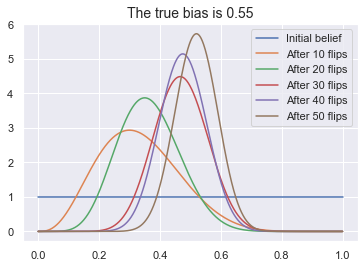

In [21]:
a = Learner2(1,1)
biased_coin = Coin(0.55)

xs = np.linspace(0,1,1000)
plt.plot(xs, a.belief().pdf(xs), label="Initial belief");

heads = biased_coin.flip(10)
a.update_bayes(heads,10)
plt.plot(xs, a.belief().pdf(xs), label="After 10 flips");

heads = biased_coin.flip(10)
a.update_bayes(heads,10)
plt.plot(xs, a.belief().pdf(xs), label="After 20 flips");

heads = biased_coin.flip(10)
a.update_bayes(heads,10)
plt.plot(xs, a.belief().pdf(xs), label="After 30 flips");

heads = biased_coin.flip(10)
a.update_bayes(heads,10)
plt.plot(xs, a.belief().pdf(xs), label="After 40 flips");

heads = biased_coin.flip(10)
a.update_bayes(heads,10)

plt.plot(xs, a.belief().pdf(xs), label="After 50 flips");
plt.title(f"The true bias is {biased_coin.bias}", fontsize=14)
plt.legend()
plt.show();

Agents will converge on the true bias regardless of their initial beliefs: 

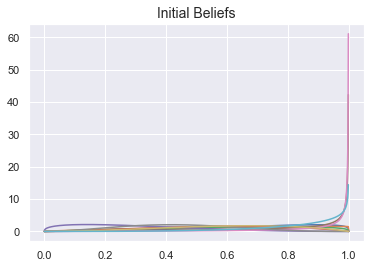

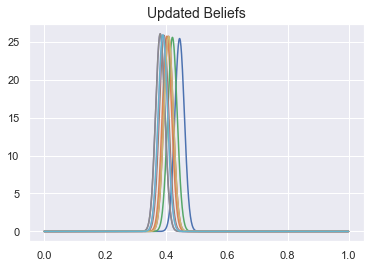

In [22]:
def plot_agent_beliefs(agents, title=None): 
    xs = np.linspace(0,1,1000)
    for a in agents:
        plt.plot(xs, a.belief().pdf(xs))
    plt.title(title, fontsize=14)
    plt.show();

num_agents = 10
num_experiments = 100
num_flips = 10
biased_coin = Coin(0.4)

# define the agents
agents = list()
for i in range(num_agents): 
    # the inital belief will be parameterized with a, b any number between 0 and 4
    a = np.random.uniform(low=0.00001, high=4)
    b = np.random.uniform(low=0.00001, high=4)
    agents.append(Learner2(a, b))

# plot their beliefs
plot_agent_beliefs(agents, title="Initial Beliefs")
plt.cla()

# let the agents perform the experiments 
for e in range(num_experiments):
    
    for a in agents:
        heads = biased_coin.flip(num_flips)
        a.update_bayes(heads,num_flips)

# plot their updated beliefs
plot_agent_beliefs(agents, title="Updated Beliefs")
    


We now plot the average distance between the mean of the agent's belief and the true bias of the coin and how that distance changes as the agents learn from observing the outcome of flipping the coin.  We perform the experiment with a fair coin and a biased coind (with bias 0.9 for heads).  

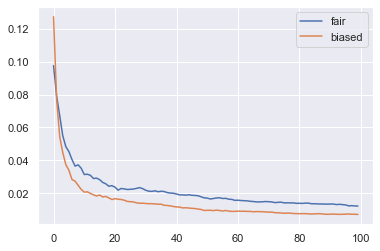

In [23]:
import math

def average_distance(agents, mean): 
    return np.average([math.fabs(a.mean() - mean) for a in agents])

num_agents = 100
num_experiments = 100
num_flips = 10

fair_coin = Coin(0.5) 
biased_coin = Coin(0.9)

agents = list()
for n in range(num_agents): 
    a = np.random.uniform(low=0.00001, high=4)
    b = np.random.uniform(low=0.00001, high=4)
    agents.append(Learner2(a, b))

avg_distances = list()
for e in range(num_experiments):
    for a in agents: 
        heads = fair_coin.flip(num_flips)
        a.update_bayes(heads,num_flips)
    avg_distances.append(average_distance(agents, fair_coin.bias))
plt.plot(range(num_experiments), avg_distances, label="fair")

agents = list()
for n in range(num_agents): 
    a = np.random.uniform(low=0.00001, high=4)
    b = np.random.uniform(low=0.00001, high=4)
    agents.append(Learner2(a, b))
avg_distances = list()
for e in range(num_experiments):
    for a in agents: 
        heads = biased_coin.flip(num_flips)
        a.update_bayes(heads,num_flips)
    avg_distances.append(average_distance(agents, biased_coin.bias))
    
plt.plot(range(num_experiments), avg_distances, label="biased")
plt.legend(bbox_to_anchor=(1,1))
plt.show();

### Learning from Others


If an agent $i$ reports that the probability of $E$ is $q$, then agents $j$'s new probability should be $Pr^{new}_j(E)=P(E\ |\ Pr_i(E)=q)$.  That is, agent $j$ conditions on the event that "$i$ reports that the probability of $E$ is $q$".  Since, in general, we will not have a prior probability over the the possible probablities that an agent may report, a very good heuristic is to define $j$'s new probability as the average of the $j$'s own probability and $i$'s reported probability: 

$$Pr^{new}_j(E) = \frac{Pr_j(E) + Pr_i(E)}{2}$$

For a discussion of this see: 

1. C. Genest  and M. J.  Schervish (1985). Modeling expert judgments for bayesian updating, The Annals of Statistics, 13(3), pgs. 1198-1212.
2.  R. Bradley (2017). Learning from others: conditioning versus averaging, Theory and Decision
3. J. W. Romeijn and O. Roy (2017). All agreed: Aumann meets DeGroot, Theory and Decision.

More generally, we are interested in aggregating the probabilities of a group of agents.  


1. C. Genest and J. V. Zidek (1986). Combining probability distributions: A critique and an annotated bibliography, Statistical Science,1(1), pp. 114 - 135.
2. F. Dietrich and C. List (2016). Probabilistic opinion pooling, in Oxford Handbook of Probability and Philosophy. 


Suppose that  $(W,\mathcal{E})$ is a set of states with a $\sigma$-algebra $\mathcal{E}$ and $\mathcal{P}$ is a set of probability measures on $(W, \mathcal{E})$.  A **probabilistic pooling method** for $n$ agents  is a function  $F:\mathcal{P}^n \rightarrow \mathcal{P}$  mapping a sequence of probability measures to a single probability measure.  There are three well-known methods that have been studied: 

**Linear pooling**: $L:\mathcal{P}^n\rightarrow \mathcal{P}$.  For all $A\in\mathcal{E}$, $L(\mathbf{P})(A)=w_1 P_1(A) + \cdots w_nP_n(A)$, with $\sum_i w_i = 1$

**Geometric pooling**: $G:\mathcal{P}^n\rightarrow \mathcal{P}$. Assuming $W$ is finite, for all $w\in W$, $G(\mathbf{P})(w)=c\cdot [P_1(w)]^{w_1} \cdots [P_n(w)]^{w_n}$    with $\sum_i w_i = 1$ and  $c=\frac{1}{\sum_{w'\in W} [P_i(w')]^{w_1}\cdots [P_i(w')]^{w_n}}$

**Multiplicative pooling**: $M:\mathcal{P}^n\rightarrow \mathcal{P}$ Assuming $W$ is finite, for all $w\in W$, $M(\mathbf{P})(w)=c\cdot [P_1(w)]\cdots [P_n(w)]$ with  $c=\frac{1}{\sum_{w'\in W} [P_i(w')]\cdots [P_i(w')]}$

Note that multiplicative pooling is geometric pooling with weights all equal to 1.  


```{note}
There is an important difference between linear pooling and geometric/multiplicative pooling.   Linear pooling can be applied to a fixed event.   Geometric/multiplicative pooling is applied to the outcomes. 
```

In [24]:
from functools import reduce

def linear_pool(probs,weights=None):
    _weights =  weights if weights is not None else [float(1) / float(len(probs)) for p in probs]
    return sum(w*p for w,p in zip(_weights,probs))

def geometric_pool(probs,weights=None):
    _weights =  weights if weights is not None else [float(1) / float(len(probs)) for p in probs]
    
    c = reduce(lambda x, y: x*y, [p**w for p,w in zip(probs,_weights)])  + reduce(lambda x, y: x*y, [(1-p)**w for p,w in zip(probs,_weights)])
    return float(reduce(lambda x, y: x*y, [p**w for p,w in zip(probs,_weights)])) / float(c)

def multiplicitave_pool(probs):
    weights = [float(1) for p in probs]
    
    return geometric_pool(probs,weights=weights)


To get a feeling for these different aggregation methods, we plot the pooled probability for a group of agents.   We fix a set of probabilities and study what happens if a new agent enters the group with some belief between the minimum and maximum of the fixed set of probabilities.  

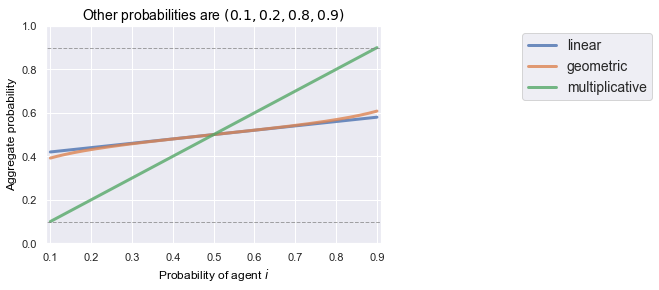

In [25]:

other_probs = [0.9,0.8,0.2,0.1]
xs = np.linspace(min(other_probs),max(other_probs),1000)
plt.ylim([0,1])
plt.xlim([min(other_probs)-0.01 ,max(other_probs) + 0.01])
plt.plot(xs, [linear_pool(other_probs + [p]) for p in list(xs)], linewidth=3, alpha=0.8, label="linear")
plt.plot(xs, [geometric_pool(other_probs + [p]) for p in list(xs)], linewidth=3, alpha=0.8, label="geometric")
plt.plot(xs, [multiplicitave_pool(other_probs + [p]) for p in list(xs)], linewidth=3, alpha=0.8, label="multiplicative")
plt.plot([0,1], [min(other_probs), min(other_probs)], marker='',linestyle='--',color='gray',   linewidth=1, alpha=0.7)
plt.plot([0,1], [max(other_probs), max(other_probs)], marker='',linestyle='--',color='gray',   linewidth=1, alpha=0.7)
plt.title("Other probabilities are $({})$".format(','.join(map(str,sorted(other_probs)))), loc='center', fontsize=14, fontweight=0, color='black')
plt.xlabel("Probability of agent $i$", color='black',fontsize=12)
plt.ylabel("Aggregate probability", color='black',fontsize=12)
plt.legend(ncol=1, bbox_to_anchor=(1.4, 1), fancybox=True, fontsize=14)
plt.show();


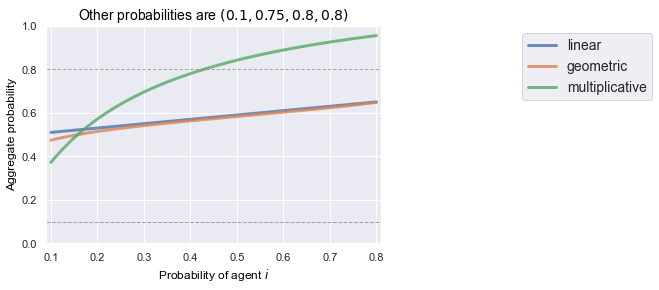

In [26]:
other_probs = [0.8,0.8,0.75,0.1]
xs = np.linspace(min(other_probs),max(other_probs),1000)
plt.ylim([0,1])
plt.xlim([min(other_probs)-0.01 ,max(other_probs) + 0.01])
plt.plot(xs, [linear_pool(other_probs + [p]) for p in list(xs)], linewidth=3, alpha=0.8, label="linear")
plt.plot(xs, [geometric_pool(other_probs + [p]) for p in list(xs)], linewidth=3, alpha=0.8, label="geometric")
plt.plot(xs, [multiplicitave_pool(other_probs + [p]) for p in list(xs)], linewidth=3, alpha=0.8, label="multiplicative")
plt.plot([0,1], [min(other_probs), min(other_probs)], marker='',linestyle='--',color='gray',   linewidth=1, alpha=0.7)
plt.plot([0,1], [max(other_probs), max(other_probs)], marker='',linestyle='--',color='gray',   linewidth=1, alpha=0.7)
plt.title("Other probabilities are $({})$".format(','.join(map(str,sorted(other_probs)))), loc='center', fontsize=14, fontweight=0, color='black')
plt.xlabel("Probability of agent $i$", color='black',fontsize=12)
plt.ylabel("Aggregate probability", color='black',fontsize=12)
plt.legend(ncol=1, bbox_to_anchor=(1.4, 1), fancybox=True, fontsize=14)
plt.show();


## Simulations

In this section of the text, we will study at the following simulations: 

1. [Hegselmann-Krause model of opinion dynamics](http://jasss.soc.surrey.ac.uk/5/3/2.html)
2. [The Condorcet Jury Theorem](http://www.franzdietrich.net/Papers/Dietrich-CondorcetJuryTheorem.pdf)
3. [Learning from Testimony](http://www.kevinzollman.com/uploads/5/0/3/6/50361245/zollman_-_modeling_the_social_consequence_of_testimonial_norms.pdf)
4. [Epistemic Networks](http://www.kevinzollman.com/uploads/5/0/3/6/50361245/zollman_-_communication_structure.pdf)
5. [Polarization](http://cailinoconnor.com/wp-content/uploads/2017/12/scientific-polarization-shareable-draft.pdf)
6. [A Bayesian Model of Deliberation](https://link.springer.com/content/pdf/10.1007%2Fs11229-016-1268-9.pdf)
